# First EDA

In [1]:
import os
import glob
import pathlib

from tqdm.notebook import tqdm
import datetime

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-darkgrid")

from PIL import Image

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

## Load Raw Data

In [2]:
%%time

data_dir = "../data/raw/"

data = pd.read_csv(data_dir + "transactions_train.csv", dtype={'article_id':str})
articles = pd.read_csv(data_dir + "articles.csv")
customers = pd.read_csv(data_dir + "customers.csv")

CPU times: user 22.6 s, sys: 15.7 s, total: 38.4 s
Wall time: 38.4 s


## Articles

### articles.csv

In [3]:
print(articles.info())
articles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  \
0                     Solid                  9             Black   
1                     Solid                 10             White   
2                    Stripe                 11         Off White   
3                     Solid                  9             Black   
4                     Solid                 10             White   

   perceived_colour_value_id perceived_colour_value_name  \
0                          4                        Dark   
1                          3                       Light   
2                          1                 Dusty Light   
3                          4                        Dark   
4                          3                       Light   

   perceived_colour_master_id perceived_colour_master_name  department_no  \
0                           5                        Black           1676   
1                           9                        White           1676   
2                           9                        White           1676   
3                           5                        Black           1339   
4                           9                        White           1339   

  department_name index_code        index_name  index_group_no  \
0    Jersey Basic          A        Ladieswear               1   
1    Jersey Basic          A        Ladieswear               1   
2    Jersey Basic          A        Ladieswear               1   
3  Clean Lingerie          B  Lingeries/Tights               1   
4  Clean Lingerie          B  Lingeries/Tights               1   

  index_group_name  section_no            section_name  garment_group_no  \
0       Ladieswear          16  Womens Everyday Basics              1002   
1       Ladieswear          16  Womens Everyday Basics              1002   
2       Ladieswear          16  Womens Everyday Basics              1002   
3       Ladieswear          61         Womens Lingerie              1017   
4       Ladieswear          61         Womens Lingerie              1017   

  garment_group_name                                        detail_desc  
0       Jersey Basic            Jersey top with narrow shoulder straps.  
1       Jersey Basic            Jersey top with narrow shoulder straps.  
2       Jersey Basic            Jersey top with narrow shoulder straps.  
3  Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4  Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...

In [4]:
articles.isnull().mean()

article_id                      0.000000
product_code                    0.000000
prod_name                       0.000000
product_type_no                 0.000000
product_type_name               0.000000
product_group_name              0.000000
graphical_appearance_no         0.000000
graphical_appearance_name       0.000000
colour_group_code               0.000000
colour_group_name               0.000000
perceived_colour_value_id       0.000000
perceived_colour_value_name     0.000000
perceived_colour_master_id      0.000000
perceived_colour_master_name    0.000000
department_no                   0.000000
department_name                 0.000000
index_code                      0.000000
index_name                      0.000000
index_group_no                  0.000000
index_group_name                0.000000
section_no                      0.000000
section_name                    0.000000
garment_group_no                0.000000
garment_group_name              0.000000
detail_desc     

In [5]:
articles = articles.astype({
    "article_id": "object",
    "product_code": "object",
    "product_type_no": "object",
    "graphical_appearance_no": "object",
    "colour_group_code": "object",
    "perceived_colour_value_id": "object",
    "perceived_colour_master_id": "object",
    "department_no": "object",
    "index_group_no": "object",
    "section_no": "object",
    "garment_group_no": "object",
})

In [6]:
nunique_article_id = articles["article_id"].nunique()
print(f"Number of Unique article id : {nunique_article_id:,}")

Number of Unique article id : 105,542


In [7]:
# NOTE: 登録されている色の種類と知覚される色の種類がが異なる割合
(articles["colour_group_name"] == articles["perceived_colour_master_name"]).mean()

0.46893179966269355

In [8]:
article_desc = articles.describe(include=["O"]).T
article_desc["mode_percentage"] = (article_desc["freq"] / article_desc["count"])

article_desc

count  unique  \
article_id                    105542  105542   
product_code                  105542   47224   
prod_name                     105542   45875   
product_type_no               105542     132   
product_type_name             105542     131   
product_group_name            105542      19   
graphical_appearance_no       105542      30   
graphical_appearance_name     105542      30   
colour_group_code             105542      50   
colour_group_name             105542      50   
perceived_colour_value_id     105542       8   
perceived_colour_value_name   105542       8   
perceived_colour_master_id    105542      20   
perceived_colour_master_name  105542      20   
department_no                 105542     299   
department_name               105542     250   
index_code                    105542      10   
index_name                    105542      10   
index_group_no                105542       5   
index_group_name              105542       5   
section_no                    105542      57   
section_name                  105542      56   
garment_group_no              105542      21   
garment_group_name            105542      21   
detail_desc                   105126   43404   

                                                            top   freq  \
article_id                                            108775015      1   
product_code                                             783707     75   
prod_name                                       Dragonfly dress     98   
product_type_no                                             272  11169   
product_type_name                                      Trousers  11169   
product_group_name                           Garment Upper body  42741   
graphical_appearance_no                                 1010016  49747   
graphical_appearance_name                                 Solid  49747   
colour_group_code                                             9  22670   
colour_group_name                                         Black  22670   
perceived_colour_value_id                                     4  42706   
perceived_colour_value_name                                Dark  42706   
perceived_colour_master_id                                    5  22585   
perceived_colour_master_name                              Black  22585   
department_no                                              7616   2032   
department_name                                          Jersey   4604   
index_code                                                    A  26001   
index_name                                           Ladieswear  26001   
index_group_no                                                1  39737   
index_group_name                                     Ladieswear  39737   
section_no                                                   15   7295   
section_name                         Womens Everyday Collection   7295   
garment_group_no                                           1005  21445   
garment_group_name                                 Jersey Fancy  21445   
detail_desc                   T-shirt in printed cotton jersey.    159   

                             mode_percentage  
article_id                          0.000009  
product_code                        0.000711  
prod_name                           0.000929  
product_type_no                     0.105825  
product_type_name                   0.105825  
product_group_name                  0.404967  
graphical_appearance_no             0.471348  
graphical_appearance_name           0.471348  
colour_group_code                   0.214796  
colour_group_name                   0.214796  
perceived_colour_value_id           0.404635  
perceived_colour_value_name         0.404635  
perceived_colour_master_id          0.213991  
perceived_colour_master_name        0.213991  
department_no                       0.019253  
department_name                     0.043622  
index_code                          0.246357  
index_name 

## Customers

### customers.csv

In [9]:
print(customers.info())
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB
None


customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

In [10]:
customers.isnull().mean()

customer_id               0.000000
FN                        0.652378
Active                    0.661508
club_member_status        0.004418
fashion_news_frequency    0.011669
age                       0.011561
postal_code               0.000000
dtype: float64

In [11]:
nunique_customer_id = customers["customer_id"].nunique()
print(f"Number of Unique customer id : {nunique_customer_id:,}")

Number of Unique customer id : 1,371,980


In [12]:
# NOTE Unique value ratio.
for col in ["FN", "Active", "club_member_status", "fashion_news_frequency"]:
    display(customers[col].value_counts(normalize=True, dropna=False).sort_index().to_frame())

FN
1.0  0.347622
NaN  0.652378

Active
1.0  0.338492
NaN  0.661508

club_member_status
ACTIVE                0.927485
LEFT CLUB             0.000340
PRE-CREATE            0.067756
NaN                   0.004418

fashion_news_frequency
Monthly                  0.000614
NONE                     0.639740
None                     0.000001
Regularly                0.347976
NaN                      0.011669

count  mean  std  min  25%  50%  75%  max
age  1356119    36   14   16   24   32   49   99

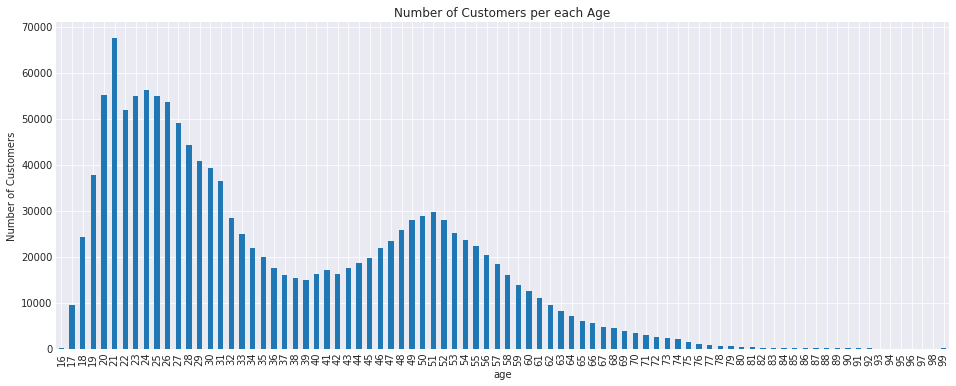

In [13]:
display(customers["age"].describe().astype(int).to_frame().T)

c_age_cnt = customers["age"].dropna().astype(int).value_counts().sort_index()
c_age_cnt.plot(
    title="Number of Customers per each Age",
    kind="bar",
    figsize=(16, 6),
)
plt.xlabel("age")
plt.ylabel("Number of Customers")
plt.show()

## Transaction Data

### transactions_train.csv

In [14]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        object 
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ GB
None


t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...  0505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...  0685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...  0685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237                 2  
3  0.016932                 2  
4  0.016932                 2

最終Submissionに使われるデータは、`transactions_train.csv`で観測される`t_dat`の最新日から翌7日間が使われる。

まずは、その最新日を確かめる。ついでに最も古い日も出す。

In [15]:
print("最新日 : ", data["t_dat"].max())
print("最も古い日 : ", data["t_dat"].min())

最新日 :  2020-09-22
最も古い日 :  2018-09-20


Submission に使われる期間は、2020-09-23 ~ 2020-09-29

In [64]:
c_rows = data["customer_id"]

In [35]:
# 一度に買うアイテム数の傾向
# モデルのseaquence_sizeの参考にする

c_cnt_each_article_cnt = c_rows.value_counts().value_counts().sort_index()
c_cumsum_each_article_cnt = c_cnt_each_article_cnt.cumsum() / c_cnt_each_article_cnt.sum()

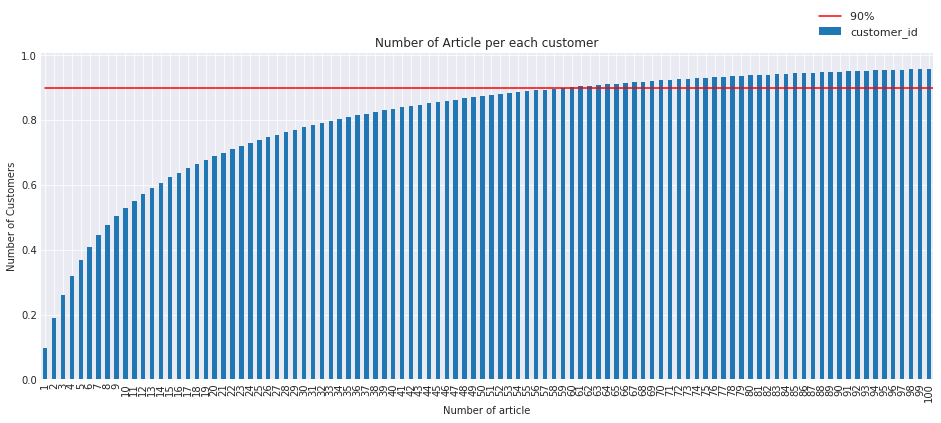

In [62]:
c_cumsum_each_article_cnt[:100].plot(
    title="Number of Article per each customer",
    kind="bar",
    figsize=(16, 6),
)
plt.plot([0, 100], [0.9, 0.9],color="red", label="90% ")
plt.legend(bbox_to_anchor=(1, 1), loc="lower right", borderaxespad=1, fontsize=11)
plt.xlabel("Number of article")
plt.ylabel("Number of Customers")
plt.show()

モデルの seaquece size は64にする。それ以上伸ばしても全体の10%にしか影響がなく、cross validation のことを考えるとさらにデータ数が減るので大部分は考慮できそう

## Specific Customer Purchase Data

In [16]:
# NOTE: データがでかすぎるので顧客を5人に絞ってデータを見てみる
smpl_c_ids = customers["customer_id"].sample(n=10, random_state=42).tolist()
smpl_c_ids

['d3b658f59ad9bbf6249a7bf0db722f2f43cc47803d03299a3feb24487f1b6fbe',
 '72529945a566eb7445e51470ef00c5992976ddaf7d9f82bd0dbb38228c0b244b',
 'd1c91a9050fcb6da04f0643c6b6d38b002b6ff12d66e804de258f69825b02fca',
 '7bad01c1ad7a9bccc9270a29bf24279b4e19b41afc1b4a605bc18e1668f9fb35',
 '4b889f848f59f9bf787b16626f96d0390c3f9ab3ed3edcc8ccc7a451d5acae10',
 'ecec63e8840393e2087453b86c5967c2e8f9ddf66d07348881206d45afdc65e9',
 'f0285b6740a766bfbd3b385cec6f8f8d10ec697eed122017e1d7a37000ce33c6',
 'bdab743dbdeb4b7cfde5aaf3f0c9d3a89d2be20a8d5428fda9428fa4ceff700a',
 '83ad3a5e70c49c438221f67cc28825ace927764632d78b8bb1a83f70c24141ac',
 '40b102e28c4e71ca4b2fc5d97699ddeac269be90c9ef0123d3a5d28e62ba4247']

In [17]:
def plot_image_samples(_df, cols=1, rows=-1):
    image_path = "../data/raw/images/"
    article_ids = _df.article_id.values[0:cols*rows]
    plt.figure(figsize=(2 + 3 * cols, 2 + 4 * rows))
    for i in range(cols * rows):
        try:
            article_id = ("0" + str(article_ids[i]))[-10:]
            plt.subplot(rows, cols, i + 1)
            plt.axis('off')
            plt.title(f"article_id={article_id}")
            image = Image.open(f"{image_path}{article_id[:3]}/{article_id}.jpg")
            plt.imshow(image)
        except:
            pass
    plt.show()

In [18]:
def print_customer_data(c_id, smpl_data):
    smpl_data["t_dat"] = pd.to_datetime(smpl_data["t_dat"], format="%Y-%m-%d")
    latest_date = pd.to_datetime("2020-09-22", format="%Y-%m-%d")
    
    print("\n" + "=" * 125 + "\n")
    
    print(f"Customer id : {c_id}")
    active_period = (smpl_data["t_dat"].max() - smpl_data["t_dat"].min()).days
    print(f"Active period : {active_period} days")

    elasped_days =  (latest_date - smpl_data["t_dat"].max()).days
    print(f"Elapsed days from last activate: {elasped_days} days")

    interval_days = smpl_data["t_dat"].drop_duplicates(keep="first").diff().apply(lambda x: x.days).tolist()
    print(f"Mean interval days :{np.mean(interval_days[1:])} days")

    cumsum_price = smpl_data["price"].sum()
    print(f"Total purchase price : {cumsum_price:.6}")
    
    plot_date = smpl_data["t_dat"].drop_duplicates(keep="first")[-5:]

    for d in plot_date:
        _smpl_data = smpl_data.query("t_dat==@d")
        
        print("\n" + "-" * 125 + "\n")
        print(d.strftime("%Y-%m-%d"))
        print(f"Number of item : {_smpl_data.shape[0]}")
        print(f"Total price : {_smpl_data.price.sum()}")
        plot_image_samples(_smpl_data, 5, 2)



Customer id : d3b658f59ad9bbf6249a7bf0db722f2f43cc47803d03299a3feb24487f1b6fbe
Active period : 202 days
Elapsed days from last activate: 227 days
Mean interval days :50.5 days
Total purchase price : 0.477729

-----------------------------------------------------------------------------------------------------------------------------

2019-07-21
Number of item : 6
Total price : 0.21345762711864366


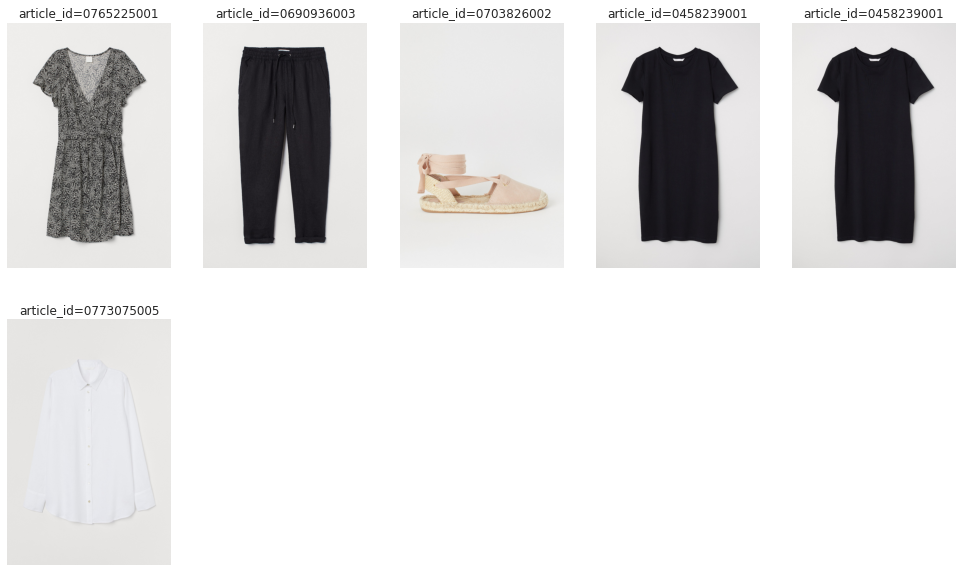


-----------------------------------------------------------------------------------------------------------------------------

2019-07-31
Number of item : 1
Total price : 0.0423559322033898


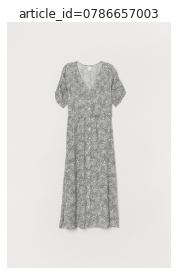


-----------------------------------------------------------------------------------------------------------------------------

2019-09-09
Number of item : 2
Total price : 0.0440338983050846


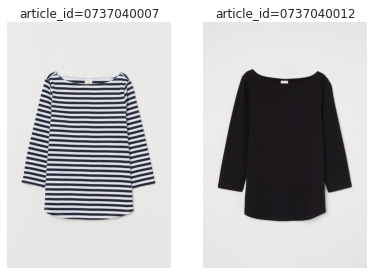


-----------------------------------------------------------------------------------------------------------------------------

2019-10-30
Number of item : 2
Total price : 0.0677627118644066


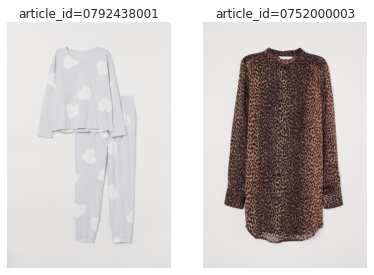


-----------------------------------------------------------------------------------------------------------------------------

2020-02-08
Number of item : 3
Total price : 0.1101186440677964


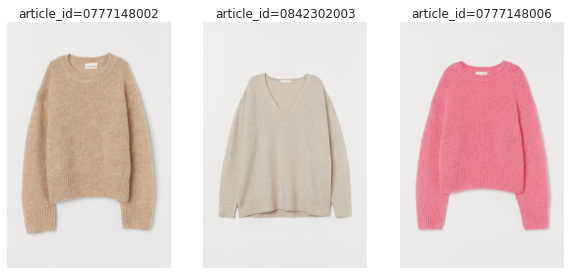



Customer id : 72529945a566eb7445e51470ef00c5992976ddaf7d9f82bd0dbb38228c0b244b
Active period : 696 days
Elapsed days from last activate: 11 days
Mean interval days :15.130434782608695 days
Total purchase price : 6.03161

-----------------------------------------------------------------------------------------------------------------------------

2020-06-16
Number of item : 5
Total price : 0.0982203389830508


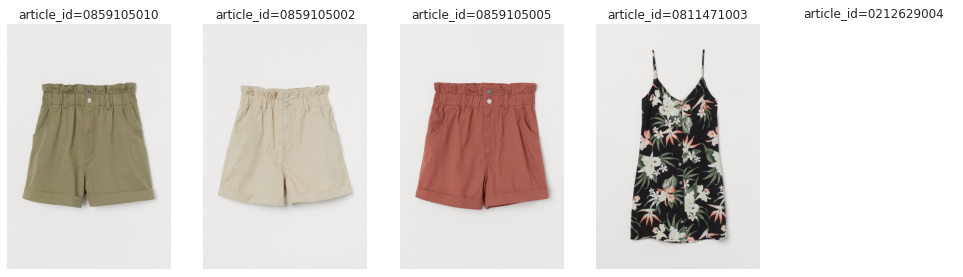


-----------------------------------------------------------------------------------------------------------------------------

2020-07-24
Number of item : 3
Total price : 0.0524915254237287


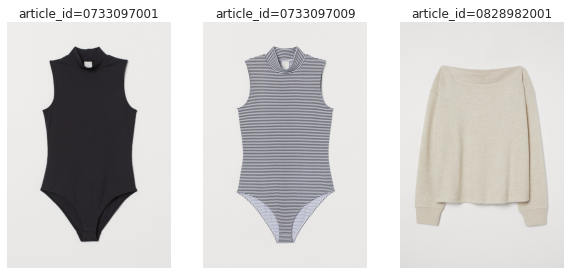


-----------------------------------------------------------------------------------------------------------------------------

2020-07-25
Number of item : 7
Total price : 0.1846271186440674


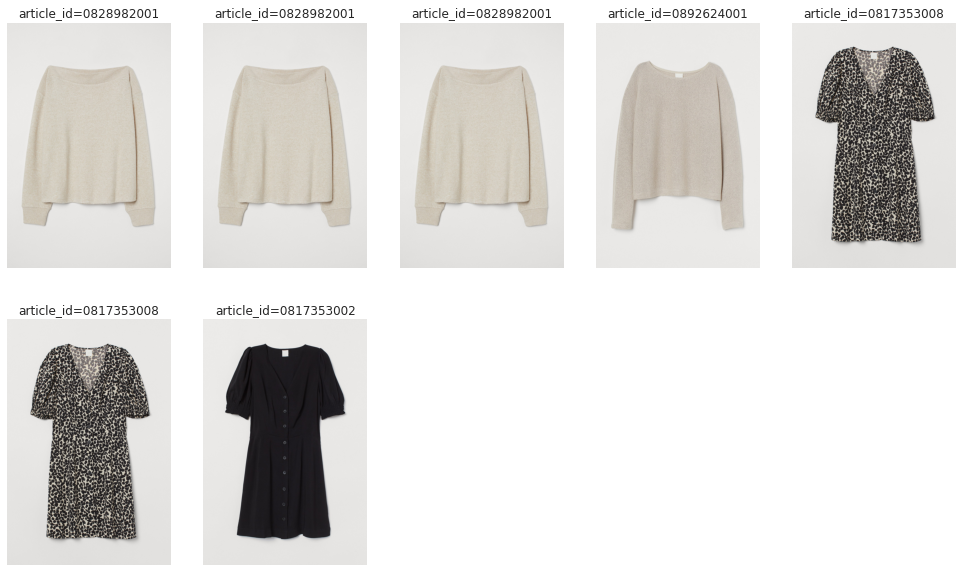


-----------------------------------------------------------------------------------------------------------------------------

2020-09-10
Number of item : 2
Total price : 0.093186440677966


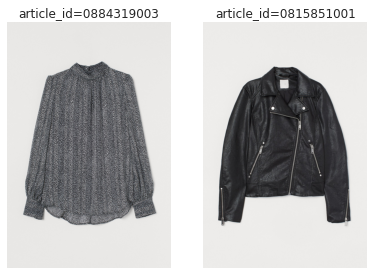


-----------------------------------------------------------------------------------------------------------------------------

2020-09-11
Number of item : 1
Total price : 0.0677796610169491


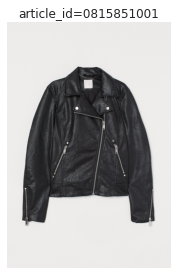



Customer id : d1c91a9050fcb6da04f0643c6b6d38b002b6ff12d66e804de258f69825b02fca
Active period : 0 days
Elapsed days from last activate: 429 days
Mean interval days :nan days
Total purchase price : 0.067

-----------------------------------------------------------------------------------------------------------------------------

2019-07-21
Number of item : 7
Total price : 0.0669999999999998


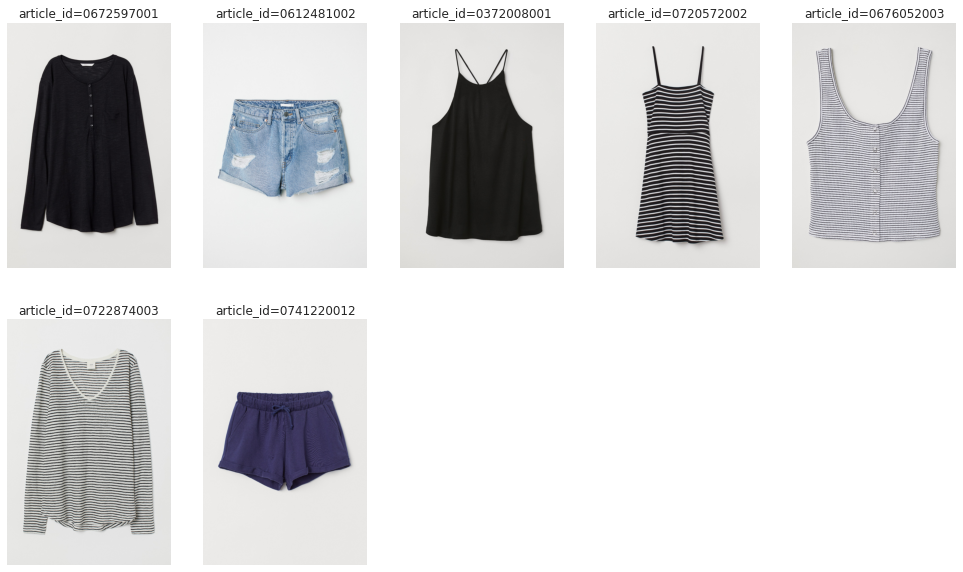



Customer id : 7bad01c1ad7a9bccc9270a29bf24279b4e19b41afc1b4a605bc18e1668f9fb35
Active period : 573 days
Elapsed days from last activate: 116 days
Mean interval days :33.705882352941174 days
Total purchase price : 1.70234

-----------------------------------------------------------------------------------------------------------------------------

2019-11-25
Number of item : 16
Total price : 0.664135593220338


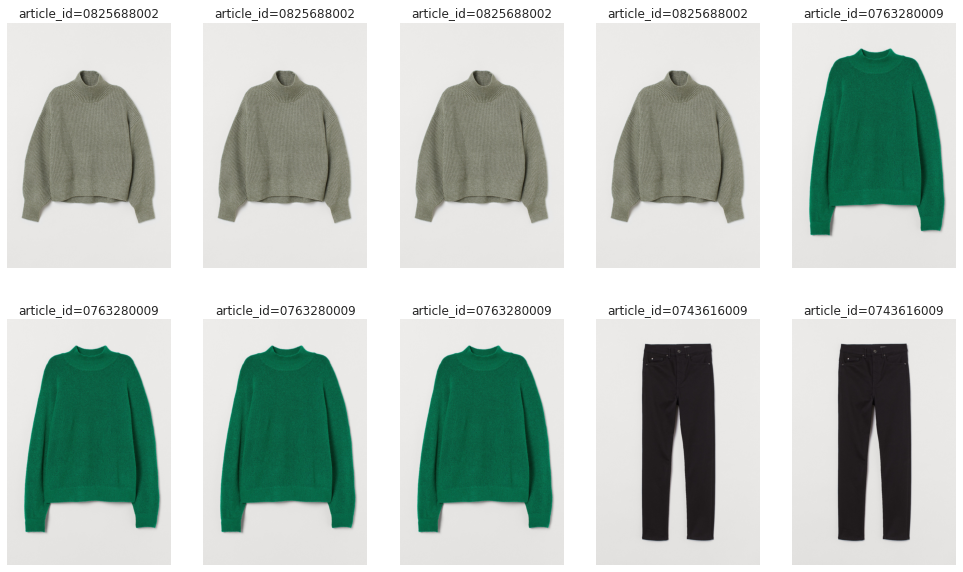


-----------------------------------------------------------------------------------------------------------------------------

2019-12-31
Number of item : 7
Total price : 0.0913728813559319


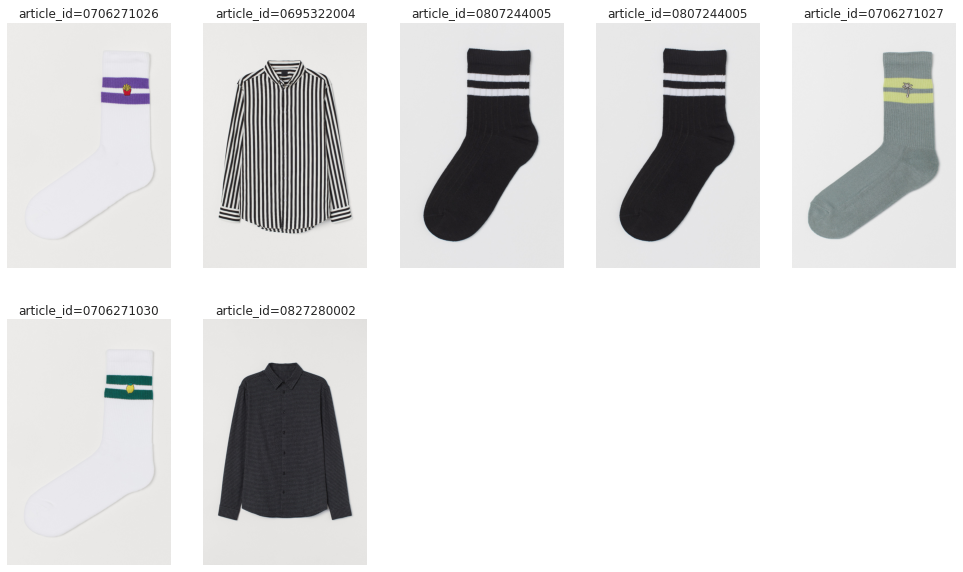


-----------------------------------------------------------------------------------------------------------------------------

2020-01-22
Number of item : 3
Total price : 0.0796101694915253


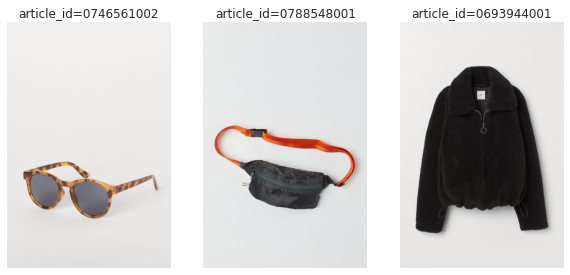


-----------------------------------------------------------------------------------------------------------------------------

2020-04-23
Number of item : 5
Total price : 0.1626271186440675


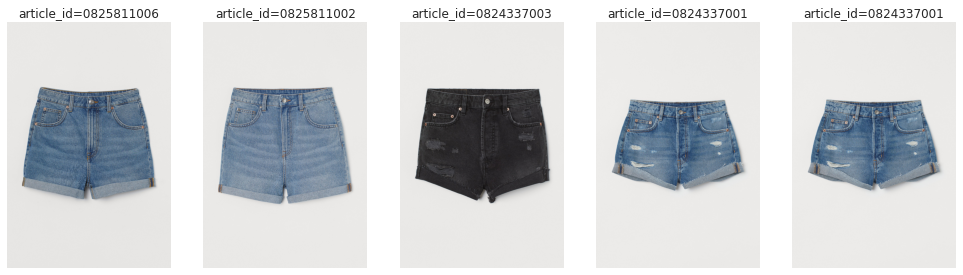


-----------------------------------------------------------------------------------------------------------------------------

2020-05-29
Number of item : 3
Total price : 0.0507966101694915


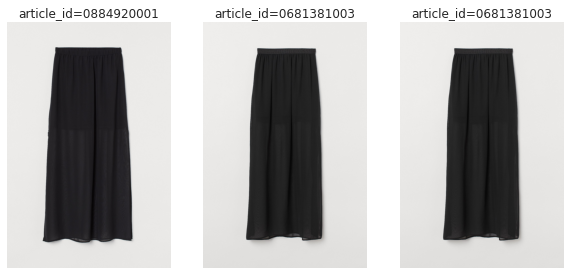



Customer id : 4b889f848f59f9bf787b16626f96d0390c3f9ab3ed3edcc8ccc7a451d5acae10
Active period : 624 days
Elapsed days from last activate: 20 days
Mean interval days :52.0 days
Total purchase price : 0.597915

-----------------------------------------------------------------------------------------------------------------------------

2019-12-18
Number of item : 3
Total price : 0.09486440677966079


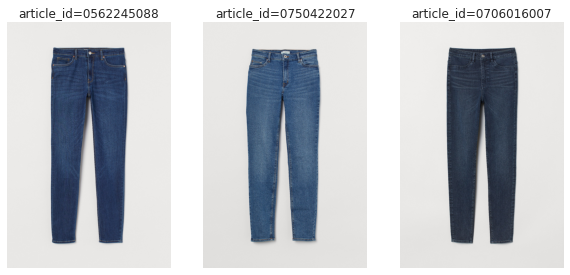


-----------------------------------------------------------------------------------------------------------------------------

2020-01-08
Number of item : 2
Total price : 0.0592881355932202


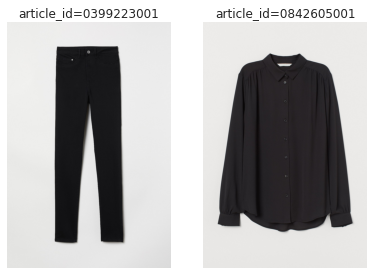


-----------------------------------------------------------------------------------------------------------------------------

2020-06-30
Number of item : 1
Total price : 0.0186271186440677


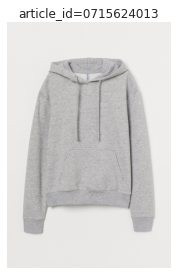


-----------------------------------------------------------------------------------------------------------------------------

2020-08-27
Number of item : 1
Total price : 0.0169322033898305


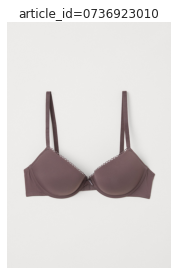


-----------------------------------------------------------------------------------------------------------------------------

2020-09-02
Number of item : 2
Total price : 0.0677627118644066


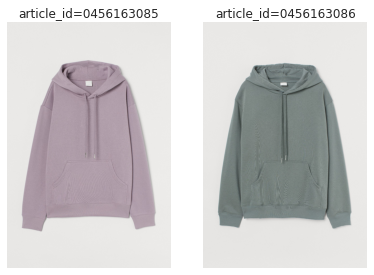



Customer id : ecec63e8840393e2087453b86c5967c2e8f9ddf66d07348881206d45afdc65e9
Active period : 527 days
Elapsed days from last activate: 115 days
Mean interval days :105.4 days
Total purchase price : 0.343441

-----------------------------------------------------------------------------------------------------------------------------

2019-02-23
Number of item : 2
Total price : 0.0503898305084745


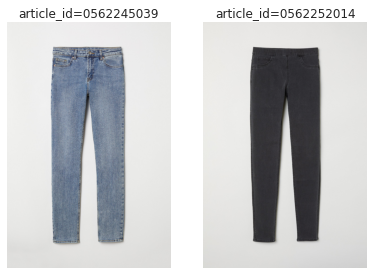


-----------------------------------------------------------------------------------------------------------------------------

2019-08-15
Number of item : 3
Total price : 0.0262372881355931


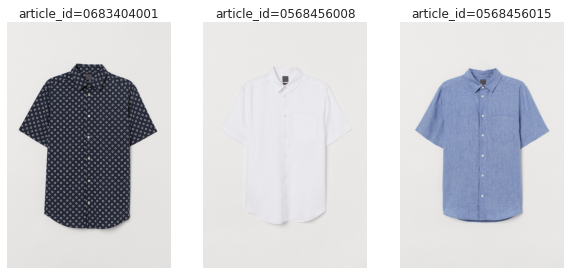


-----------------------------------------------------------------------------------------------------------------------------

2019-10-24
Number of item : 1
Total price : 0.0508305084745762


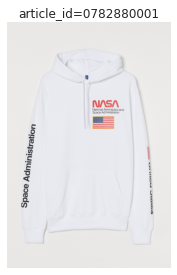


-----------------------------------------------------------------------------------------------------------------------------

2019-12-30
Number of item : 1
Total price : 0.0169322033898305


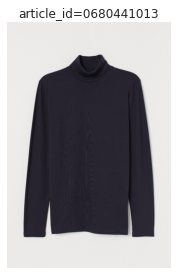


-----------------------------------------------------------------------------------------------------------------------------

2020-05-30
Number of item : 4
Total price : 0.0687457627118642


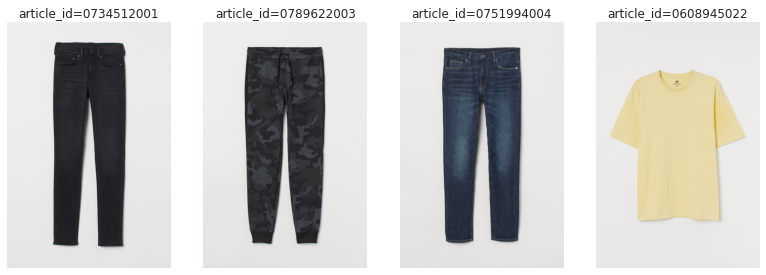



Customer id : f0285b6740a766bfbd3b385cec6f8f8d10ec697eed122017e1d7a37000ce33c6
Active period : 685 days
Elapsed days from last activate: 12 days
Mean interval days :68.5 days
Total purchase price : 0.474254

-----------------------------------------------------------------------------------------------------------------------------

2019-11-29
Number of item : 2
Total price : 0.047423728813559204


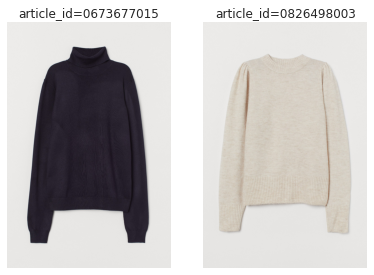


-----------------------------------------------------------------------------------------------------------------------------

2020-01-02
Number of item : 1
Total price : 0.0338813559322033


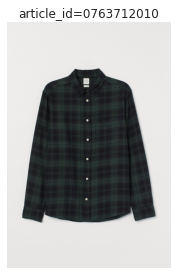


-----------------------------------------------------------------------------------------------------------------------------

2020-07-10
Number of item : 4
Total price : 0.08976271186440651


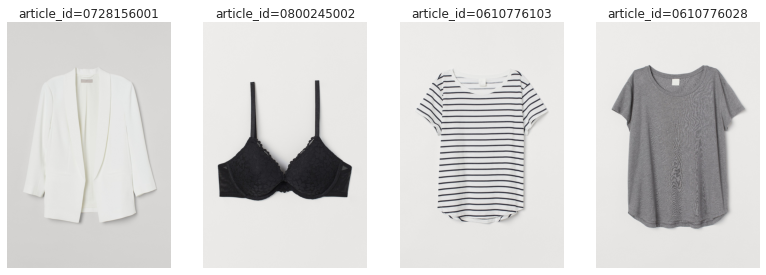


-----------------------------------------------------------------------------------------------------------------------------

2020-08-08
Number of item : 1
Total price : 0.0338813559322033


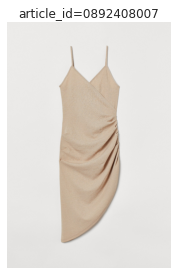


-----------------------------------------------------------------------------------------------------------------------------

2020-09-10
Number of item : 2
Total price : 0.0677627118644066


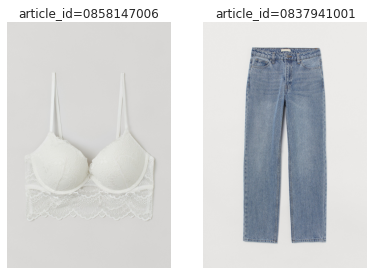



Customer id : bdab743dbdeb4b7cfde5aaf3f0c9d3a89d2be20a8d5428fda9428fa4ceff700a
Active period : 395 days
Elapsed days from last activate: 273 days
Mean interval days :79.0 days
Total purchase price : 0.655356

-----------------------------------------------------------------------------------------------------------------------------

2018-12-16
Number of item : 4
Total price : 0.0475762711864405


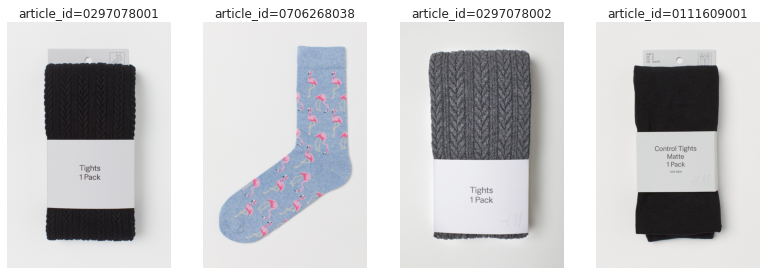


-----------------------------------------------------------------------------------------------------------------------------

2019-06-24
Number of item : 3
Total price : 0.06944067796610151


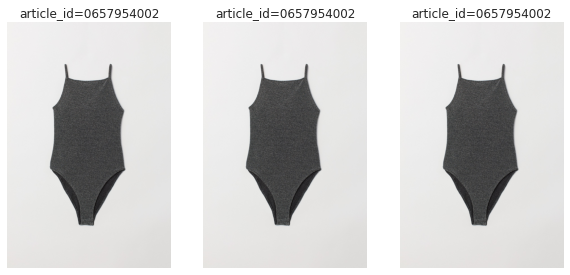


-----------------------------------------------------------------------------------------------------------------------------

2019-06-25
Number of item : 13
Total price : 0.2353728813559317


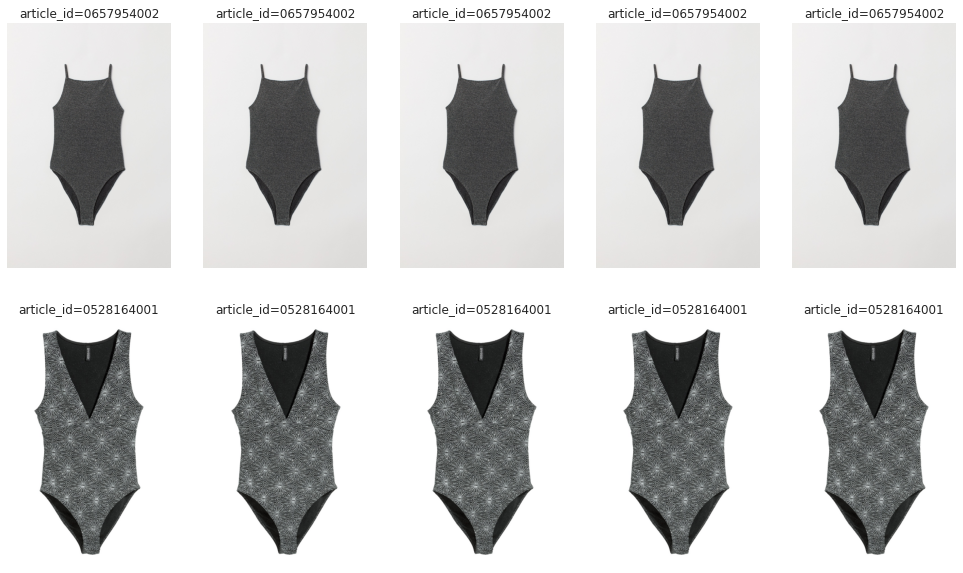


-----------------------------------------------------------------------------------------------------------------------------

2019-06-26
Number of item : 13
Total price : 0.17774576271186368


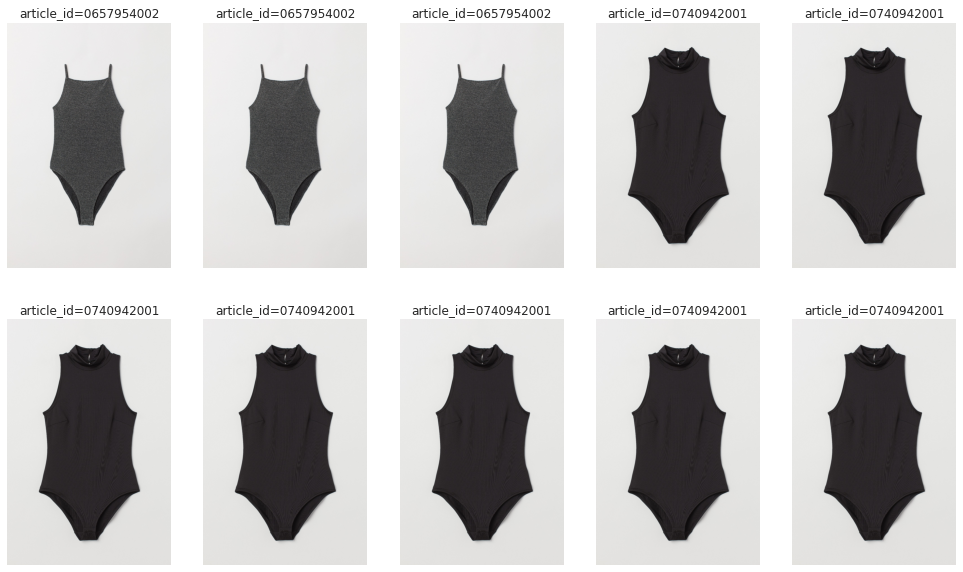


-----------------------------------------------------------------------------------------------------------------------------

2019-12-24
Number of item : 8
Total price : 0.041525423728813196


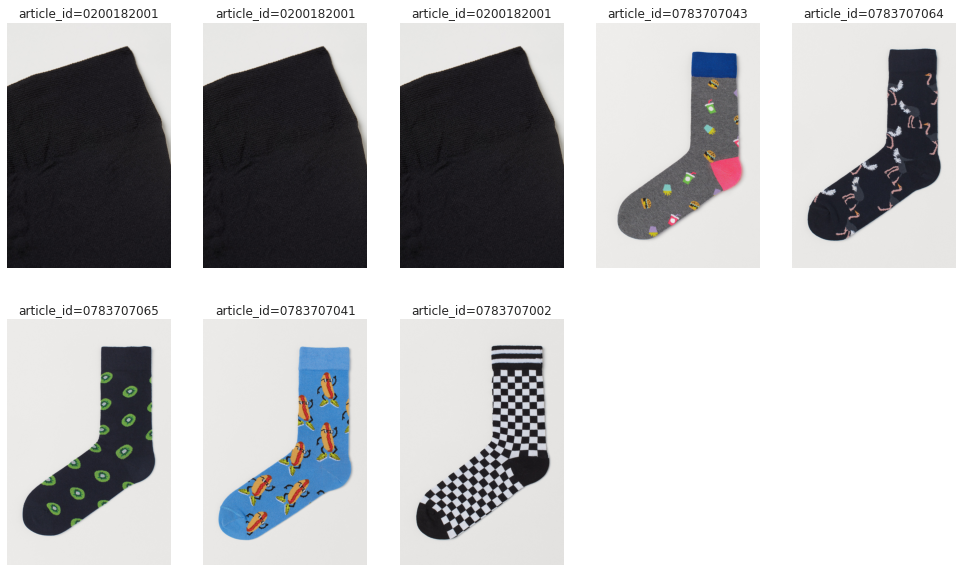



Customer id : 83ad3a5e70c49c438221f67cc28825ace927764632d78b8bb1a83f70c24141ac
Active period : 362 days
Elapsed days from last activate: 55 days
Mean interval days :362.0 days
Total purchase price : 0.381085

-----------------------------------------------------------------------------------------------------------------------------

2019-08-02
Number of item : 12
Total price : 0.2964067796610165


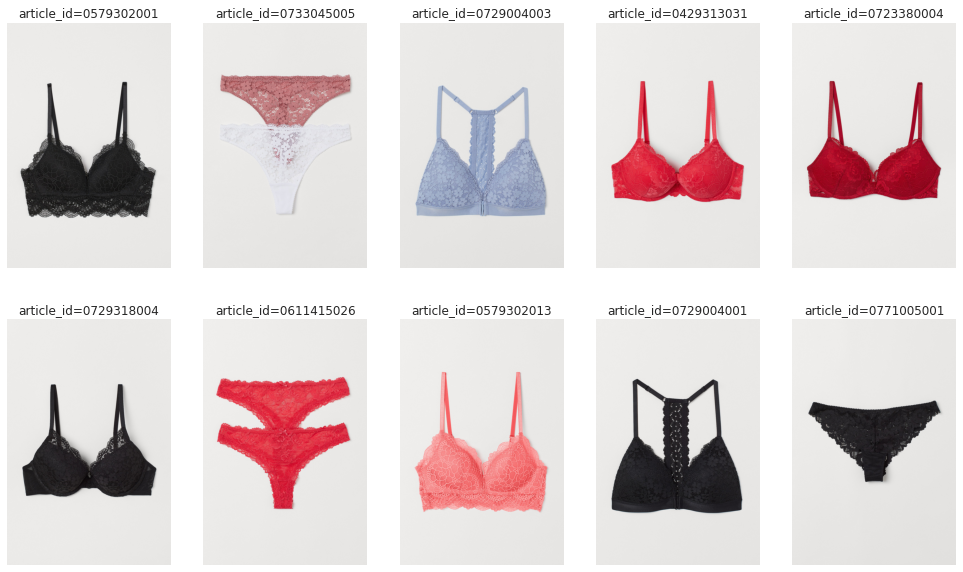


-----------------------------------------------------------------------------------------------------------------------------

2020-07-29
Number of item : 4
Total price : 0.08467796610169481


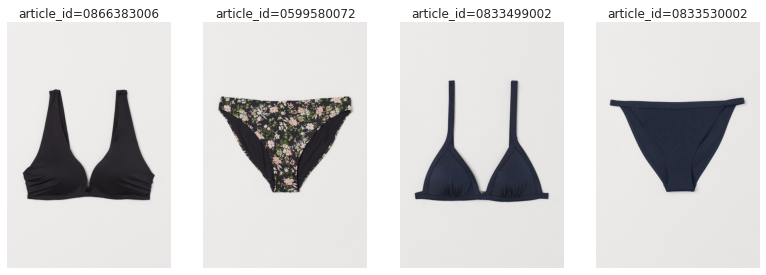



Customer id : 40b102e28c4e71ca4b2fc5d97699ddeac269be90c9ef0123d3a5d28e62ba4247
Active period : 0 days
Elapsed days from last activate: 284 days
Mean interval days :nan days
Total purchase price : 0.0847288

-----------------------------------------------------------------------------------------------------------------------------

2019-12-13
Number of item : 1
Total price : 0.084728813559322


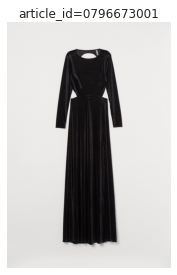

In [19]:
for c_id in smpl_c_ids:
    smpl_data = data.loc[data["customer_id"]==c_id, data.columns != "customer_id"].copy().reset_index(drop=True)
    print_customer_data(c_id, smpl_data)